In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
# Importing the data

# Define the path to the main directory
path = '/Users/patryknextdoor/Desktop/DATA SCIENCE/CodeCool/Dataset/'
subdirs = [os.path.join(path, subdir) for subdir in os.listdir(path) if subdir.startswith('sesion_')]

df_list = []

for subdir in subdirs:
    files = [os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('_air.txt')]
    for file in files:
        df = pd.read_csv(file, header=None, names=['Air Wavelength Signal', ' Air Wavelength Amplitude'])
        df_list.append(df)
air_df = pd.concat(df_list, axis=0)
subdirs = [os.path.join(path, subdir) for subdir in os.listdir(path) if subdir.startswith('sesion_')]
df_list = []
for subdir in subdirs:
    files = [os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('_water.txt')]
    for file in files:
        df = pd.read_csv(file, header=None, names=['Water Wavelength Signal', ' Water Wavelength Amplitude'])
        df_list.append(df)
water_df = pd.concat(df_list, axis=0)

df_list = []


for subdir in subdirs:
    files = [os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('_izopropanol.txt')]
    for file in files:
        df = pd.read_csv(file, header=None, names=['Izopropanol Wavelength Signal', ' Izopropanol Wavelength Amplitude'])
        df_list.append(df)
izopropanol_df = pd.concat(df_list, axis=0)

In [14]:
dataset = pd.concat([air_df,water_df,izopropanol_df], axis=1)
dataset

,Air Wavelength Signal,Air Wavelength Amplitude,Water Wavelength Signal,Water Wavelength Amplitude,Izopropanol Wavelength Signal,Izopropanol Wavelength Amplitude
0,0.000001,8.8064,0.000001,8.11800,0.000001,8.25940
1,0.000001,8.9714,0.000001,8.21770,0.000001,8.32460
2,0.000001,8.9747,0.000001,8.06960,0.000001,8.29750
3,0.000001,8.8461,0.000001,8.13020,0.000001,8.33000
4,0.000001,8.8265,0.000001,7.96940,0.000001,8.26280
...,...,...,...,...,...,...
2996,0.000002,3.2784,0.000002,-0.86565,0.000002,-0.61478
2997,0.000002,3.4213,0.000002,-0.84435,0.000002,-0.53629
2998,0.000002,3.3112,0.000002,-0.97383,0.000002,-0.81838
2999,0.000002,3.4500,0.000002,-0.63849,0.000002,-0.57202


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

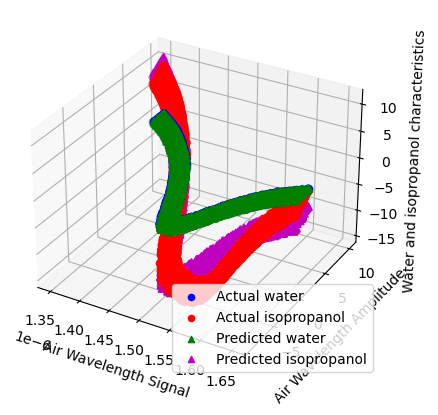

In [20]:
# Load the dataset
dataset = pd.concat([air_df,water_df,izopropanol_df], axis=1)

X = dataset.iloc[:,:2].values # input features
y = dataset.iloc[:,2:].values # target variable

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the data points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test[:,0], c='b', marker='o', label='Actual water')
ax.scatter(X_test[:,0], X_test[:,1], y_test[:,1], c='r', marker='o', label='Actual isopropanol')
ax.scatter(X_test[:,0], X_test[:,1], y_pred[:,0], c='g', marker='^', label='Predicted water')
ax.scatter(X_test[:,0], X_test[:,1], y_pred[:,1], c='m', marker='^', label='Predicted isopropanol')
ax.set_xlabel('Air Wavelength Signal')
ax.set_ylabel('Air Wavelength Amplitude')
ax.set_zlabel('Water and isopropanol characteristics')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE, and R2 for water
mae_water = mean_absolute_error(y_test[:,0], y_pred[:,0])
mse_water = mean_squared_error(y_test[:,0], y_pred[:,0])
rmse_water = np.sqrt(mse_water)
r2_water = r2_score(y_test[:,0], y_pred[:,0])

# Calculate MAE, MSE, RMSE, and R2 for isopropanol
mae_iso = mean_absolute_error(y_test[:,1], y_pred[:,1])
mse_iso = mean_squared_error(y_test[:,1], y_pred[:,1])
rmse_iso = np.sqrt(mse_iso)
r2_iso = r2_score(y_test[:,1], y_pred[:,1])

print('Water:')
print('MAE =', mae_water)
print('MSE =', mse_water)
print('RMSE =', rmse_water)
print('R² =', r2_water)
print('\nIsopropanol:')
print('MAE =', mae_iso)
print('MSE =', mse_iso)
print('RMSE =', rmse_iso)
print('R² =', r2_iso)

Water:
MAE = 1.2334335153286547e-22
MSE = 2.6118970643276565e-44
RMSE = 1.616136462161428e-22
R² = 1.0

Isopropanol:
MAE = 1.7376135577794931
MSE = 4.630564860242051
RMSE = 2.1518747315403957
R² = 0.8918831640107776


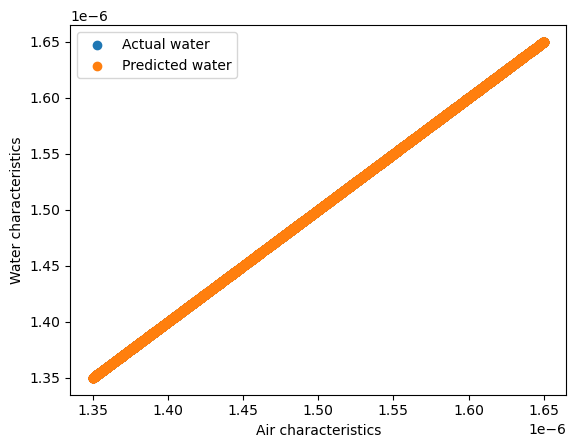

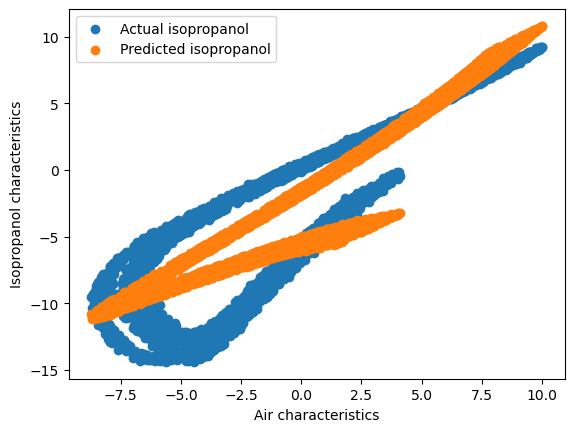

In [23]:
# Plot the predicted and actual values for water
plt.scatter(X_test[:,0], y_test[:,0], label='Actual water')
plt.scatter(X_test[:,0], y_pred[:,0], label='Predicted water')
plt.xlabel('Air characteristics')
plt.ylabel('Water characteristics')
plt.legend()
plt.show()

# Plot the predicted and actual values for isopropanol
plt.scatter(X_test[:,1], y_test[:,1], label='Actual isopropanol')
plt.scatter(X_test[:,1], y_pred[:,1], label='Predicted isopropanol')
plt.xlabel('Air characteristics')
plt.ylabel('Isopropanol characteristics')
plt.legend()
plt.show()